<h3 align='center'>Customer Churn Prediction Using Artificial Neural Network (ANN)</h3>

In [283]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Load data

In [284]:
df  = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2129,9787-XVQIU,Male,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.30,75.3,Yes
1847,1098-KFQEC,Female,0,Yes,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.40,1083,No
2010,3074-GQWYX,Male,0,No,No,5,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.90,357.75,Yes
4976,8165-CBKXO,Male,0,Yes,Yes,66,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),56.75,3708.4,No
4043,3308-JSGML,Male,1,Yes,No,59,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),64.05,3886.85,No


Basic Exploration - Drop Unnecessary Column

In [285]:
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

TotalCharges Column should be float

In [286]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [287]:
# pd.to_numeric(df.TotalCharges)

It has some Empty spaces

In [288]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [289]:
df.shape

(7043, 20)

In [290]:
df.iloc[488]['TotalCharges']

' '

In [291]:
df[df.TotalCharges!=' '].shape

(7032, 20)

Remove rows with Spaces in TotalCharges

In [292]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [293]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [294]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_20788\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [295]:
df1.TotalCharges.dtypes

dtype('float64')

Data Visualisation

Text(0.5, 1.0, 'Customer Churn by Tenure')

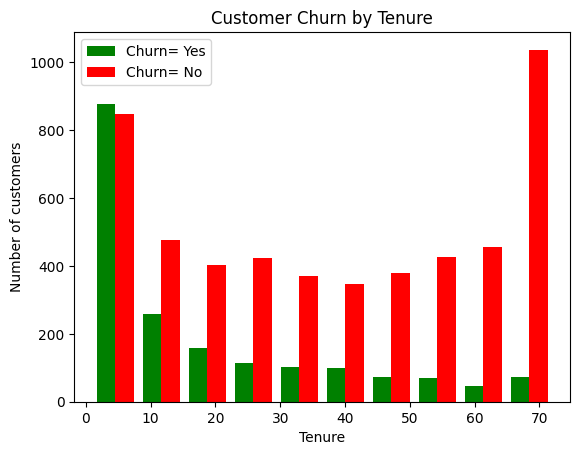

In [296]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color =['green', 'red'], label=['Churn= Yes', 'Churn= No'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel("Number of customers")
plt.title('Customer Churn by Tenure')

Text(0.5, 1.0, 'Customer Churn Monthly Charges')

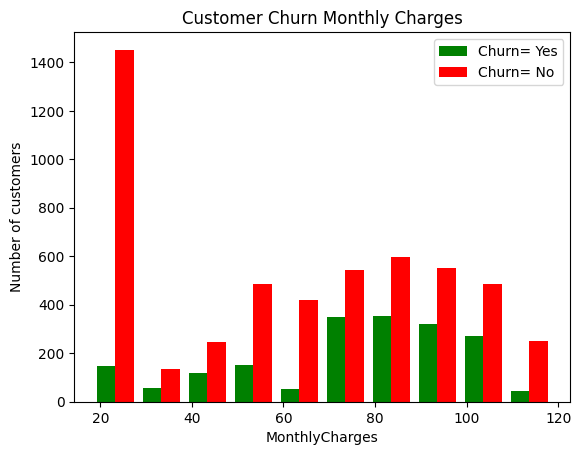

In [297]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.hist([tenure_churn_yes, tenure_churn_no], color =['green', 'red'], label=['Churn= Yes', 'Churn= No'])
plt.legend()
plt.xlabel('MonthlyCharges')
plt.ylabel("Number of customers")
plt.title('Customer Churn Monthly Charges')

Printing Unique Values of each column

In [298]:
def print_col_unique_values(df):
    for column in df1:
        if df[column].dtypes=='object':
            print(f'{column}: {df1[column].unique()}')

In [299]:
print_col_unique_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Some columns have No Internet Service which can be converted to just 'NO'

In [300]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_20788\4245438437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_20788\4245438437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [301]:
print_col_unique_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [302]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Encoding 

Convert Yes and No with 1 and 0

In [303]:
yes_no_column = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_column:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_20788\1657173457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)


In [304]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


Converting values of Gender into 0 and 1 

In [305]:
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_20788\3771459934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)


In [306]:
df1.gender.unique()

array([1, 0], dtype=int64)

Get dummy variables for rest of the columns

In [307]:
df2 = pd.get_dummies(data = df1, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [308]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5712,1,0,0,0,23,1,0,0,0,0,...,False,False,True,True,False,False,True,False,False,False
5630,1,0,0,0,39,1,1,0,1,1,...,False,True,False,True,False,False,False,False,True,False
1446,0,0,0,1,1,1,1,0,0,0,...,True,False,False,True,False,False,False,False,True,False
619,1,0,0,0,7,1,1,0,1,0,...,False,True,False,True,False,False,True,False,False,False
5146,0,0,0,1,11,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [309]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

##### Changing all features to float to remove error

In [310]:
bool_to_int_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

df2[bool_to_int_cols] = df2[bool_to_int_cols].astype(np.float64)

In [311]:
df2.dtypes

gender                                     float64
SeniorCitizen                              float64
Partner                                    float64
Dependents                                 float64
tenure                                     float64
PhoneService                               float64
MultipleLines                              float64
OnlineSecurity                             float64
OnlineBackup                               float64
DeviceProtection                           float64
TechSupport                                float64
StreamingTV                                float64
StreamingMovies                            float64
PaperlessBilling                           float64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                      float64
InternetService_DSL                        float64
InternetService_Fiber optic                float64
InternetService_No             

### Scalling features

In [312]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [313]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1. 0.]
SeniorCitizen: [0. 1.]
Partner: [1. 0.]
Dependents: [0. 1.]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0. 1.]
MultipleLines: [0. 1.]
OnlineSecurity: [0. 1.]
OnlineBackup: [1. 0.]
DeviceProtection: [0. 

### Train Test Split

In [314]:
df2.shape

(7032, 27)

In [315]:
X = df2.drop('Churn', axis='columns')
y = df2.Churn

In [316]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [317]:
X_train.shape

(5625, 26)

In [318]:
X_test.shape

(1407, 26)

In [319]:
y_train.shape

(5625,)

In [320]:
y_train = np.array(y_train).reshape(-1, 1)

In [321]:
y_train.shape

(5625, 1)

### Build an ANN model in tensorflow/keras

In [322]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [323]:
model = keras.Sequential()

model.add(Dense(20, input_shape = (26,), activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [324]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 20)                540       
                                                                 
 dense_46 (Dense)            (None, 15)                315       
                                                                 
 dense_47 (Dense)            (None, 1)                 16        
                                                                 
Total params: 871 (3.40 KB)
Trainable params: 871 (3.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [325]:
model.fit(X_train, y_train, epochs= 100)

Epoch 1/100
176/176 [==============================] - 1s 689us/step - loss: 0.5064 - accuracy: 0.7516
Epoch 2/100
  1/176 [..............................] - ETA: 0s - loss: 0.6436 - accuracy: 0.7188

176/176 [==============================] - 0s 852us/step - loss: 0.4320 - accuracy: 0.7934
Epoch 3/100
176/176 [==============================] - 0s 668us/step - loss: 0.4232 - accuracy: 0.7973
Epoch 4/100
176/176 [==============================] - 0s 641us/step - loss: 0.4192 - accuracy: 0.8028
Epoch 5/100
176/176 [==============================] - 0s 659us/step - loss: 0.4168 - accuracy: 0.8020
Epoch 6/100
176/176 [==============================] - 0s 626us/step - loss: 0.4140 - accuracy: 0.8043
Epoch 7/100
176/176 [==============================] - 0s 632us/step - loss: 0.4134 - accuracy: 0.8071
Epoch 8/100
176/176 [==============================] - 0s 687us/step - loss: 0.4121 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 0s 650us/step - loss: 0.4113 - accuracy: 0.8060
Epoch 10/100
176/176 [==============================] - 0s 626us/step - loss: 0.4101 - accuracy: 0.8059
Epoch 11/100
176/176 [==============================] - 0s 639us/step - loss: 0.4089

In [326]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 553us/step - loss: 0.4670 - accuracy: 0.7747


[0.46696531772613525, 0.7746979594230652]

In [327]:
y_p = model.predict(X_test)
y_p[:5]

44/44 [==============================] - 0s 726us/step


array([[0.02851477],
       [0.14281194],
       [0.5363885 ],
       [0.02924273],
       [0.7095558 ]], dtype=float32)

In [328]:
y_test[:10]

2481    0.0
6784    0.0
6125    1.0
3052    0.0
4099    0.0
3223    0.0
3774    0.0
3469    0.0
3420    0.0
1196    0.0
Name: Churn, dtype: float64

In [329]:
y_pred = []
for element in y_p:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [330]:
y_pred[:10]

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0]

### Classification Report and Confusion Matrics

In [331]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      1033
         1.0       0.60      0.45      0.51       374

    accuracy                           0.77      1407
   macro avg       0.71      0.67      0.68      1407
weighted avg       0.76      0.77      0.76      1407



Text(70.72222222222221, 0.5, 'Truth')

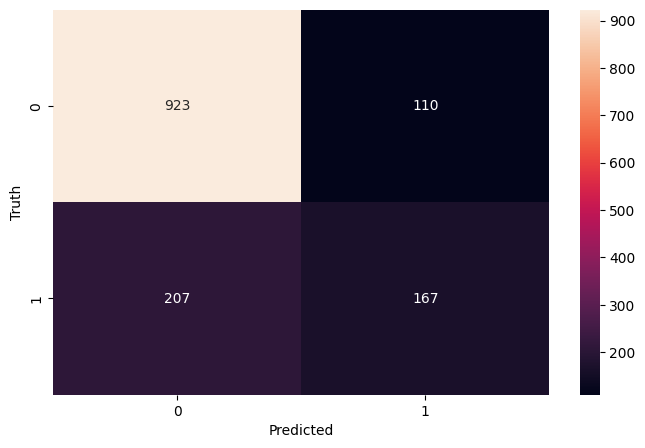

In [332]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_pred)

plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')